In [24]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score

In [7]:
train_url = "./Data/Train/train_data.csv"
test_url = "./Data/Test/test_data.csv"

train_data = pd.read_csv(train_url)
test_data = pd.read_csv(test_url)

print(train_data.shape)
print(test_data.shape)
train_data.head()

(800000, 8)
(200000, 8)


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,5.572427,4.850337,1.149870,1.0,0.0,0.0,0.0,0.0
1,5.327530,3.933291,1.682739,1.0,1.0,0.0,1.0,0.0
2,78.945633,0.023222,2.740935,1.0,1.0,0.0,1.0,0.0
3,10.119026,26.548445,1.945075,1.0,0.0,0.0,0.0,0.0
4,33.646388,1.909240,0.888281,1.0,0.0,0.0,0.0,0.0


In [8]:
train_X, train_Y = train_data.drop("fraud", axis=1), train_data["fraud"]
test_X, test_Y = test_data.drop("fraud", axis=1), test_data["fraud"]
print("Train Data Shape", train_X.shape, train_Y.shape)
print(train_Y.value_counts())
print("Test Data Shape", test_X.shape, test_Y.shape)
print(test_Y.value_counts())
train_X.head()

Train Data Shape (800000, 7) (800000,)
0.0    730181
1.0     69819
Name: fraud, dtype: int64
Test Data Shape (200000, 7) (200000,)
0.0    182416
1.0     17584
Name: fraud, dtype: int64


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,5.572427,4.850337,1.149870,1.0,0.0,0.0,0.0
1,5.327530,3.933291,1.682739,1.0,1.0,0.0,1.0
2,78.945633,0.023222,2.740935,1.0,1.0,0.0,1.0
3,10.119026,26.548445,1.945075,1.0,0.0,0.0,0.0
4,33.646388,1.909240,0.888281,1.0,0.0,0.0,0.0


### Logistic Regression 

In [12]:
#train model with training data
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(train_X, train_Y)

LogisticRegression(random_state=0, solver='liblinear')

In [13]:
#Get prediction 
predict_Y = model.predict(test_X)

In [14]:
#Get accuracy
acc = accuracy_score(test_Y, predict_Y)
print(acc)

0.95825


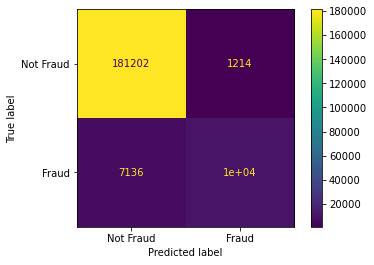

In [19]:
c_matrix = confusion_matrix(test_Y, predict_Y)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=["Not Fraud", "Fraud"])
disp.plot()

In [22]:
f1_score(test_Y, predict_Y, average=None)

array([0.97747833, 0.71449087])

### Logistic Regression - After preprocessing

In [29]:
scaler = preprocessing.StandardScaler().fit(train_X)
train_X_scaled = scaler.transform(train_X)

scaler = preprocessing.StandardScaler().fit(test_X)
test_X_scaled = scaler.transform(test_X)

In [30]:
#train model with training data
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(train_X_scaled, train_Y)

LogisticRegression(random_state=0, solver='liblinear')

In [31]:
#Get prediction 
predict_Y = model.predict(test_X_scaled)

In [32]:
#Get accuracy
acc = accuracy_score(test_Y, predict_Y)
print(acc)

0.95847


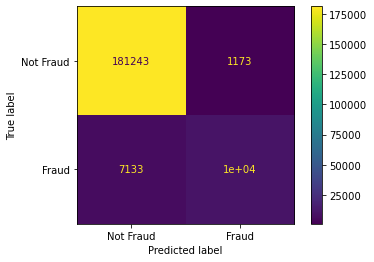

In [33]:
c_matrix = confusion_matrix(test_Y, predict_Y)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=["Not Fraud", "Fraud"])
disp.plot()

In [34]:
f1_score(test_Y, predict_Y, average=None)

array([0.9775993 , 0.71562586])

### 